<a href="https://colab.research.google.com/github/chandru-2001/ByME/blob/main/Spam_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic data tools
import pandas as pd


In [3]:
import numpy as np



In [4]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import joblib


In [5]:

dataset_link = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(dataset_link, sep="\t", header=None, names=["type", "text"])
print("Dataset shape:", data.shape)
data.sample(5)


Dataset shape: (5572, 2)


,type,text
122,ham,here is my new address -apples&pairs&all that ...
3175,ham,It vl bcum more difficult..
973,ham,Yup i thk so until e shop closes lor.
1122,spam,Do you want 750 anytime any network mins 150 t...
4673,spam,Customer service announcement. We recently tri...


In [6]:
data['target'] = data['type'].apply(lambda x: 1 if x == 'spam' else 0)
texts = data['text']
labels = data['target']
print("Spam count =", labels.sum())
print("Ham count =", len(labels) - labels.sum())
msg_train, msg_test, y_train, y_test = train_test_split(
    texts,
    labels,
    test_size=0.22,
    random_state=12,
    stratify=labels
)
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=2,
    ngram_range=(1, 2)
)

X_train = vectorizer.fit_transform(msg_train)
X_test  = vectorizer.transform(msg_test)
model = MultinomialNB(alpha=0.7)
model.fit(X_train, y_train)


Spam count = 747
Ham count = 4825


MultinomialNB(alpha=0.7)

MODEL REPORT
------------------------------
Accuracy    : 0.9715
Precision   : 1.0000
Recall      : 0.7866
F1 Score    : 0.8805


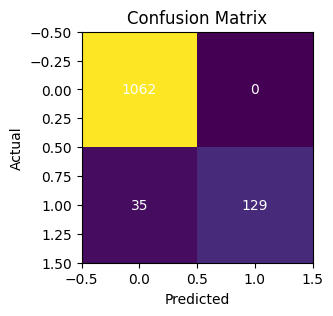

⚠️ SPAM
✔️ NOT SPAM


In [9]:
predictions = model.predict(X_test)

print("MODEL REPORT")
print("------------------------------")
print(f"Accuracy    : {accuracy_score(y_test, predictions):.4f}")
print(f"Precision   : {precision_score(y_test, predictions):.4f}")
print(f"Recall      : {recall_score(y_test, predictions):.4f}")
print(f"F1 Score    : {f1_score(y_test, predictions):.4f}")

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(4,3))
plt.imshow(cm, cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()
def check_message(msg):
    vec = vectorizer.transform([msg])
    out = model.predict(vec)[0]
    return "⚠️ SPAM" if out == 1 else "✔️ NOT SPAM"


print(check_message("Urgent!!! You won a free flight ticket to Dubai! Claim now"))
print(check_message("Hi bro, meeting postponed to 3 PM today."))


In [8]:
joblib.dump(model, "spam_model_v1.pkl")
joblib.dump(vectorizer, "spam_vectorizer_v1.pkl")
print("Files saved successfully!")


Files saved successfully!
